In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import *

In [85]:
#Definiendo el estilo de sns
sns.set(style='whitegrid', context='notebook')

In [86]:
# Obteniendo la base de datos
data = pd.read_csv('ObesityDataSet.csv')
data.head(4)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I


In [87]:
# Extrayendo las columnas con datos numéricos
columnas = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
columnas

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

<Axes: >

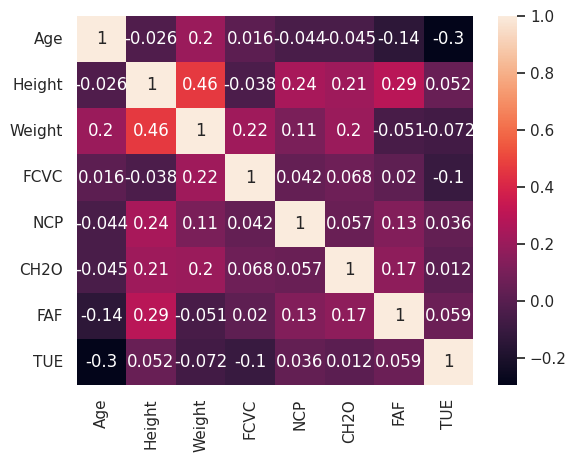

In [88]:
# Tabla de correlaciones de variables
matriz = data[columnas].corr()
sns.heatmap(matriz, annot=True)

In [89]:
#Seleccionando las variable
x = data[['Height', 'FAF']].values
y = data['Weight'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_sc = StandardScaler()
y_sc = StandardScaler()

x_train = x_sc.fit_transform(x_train)
x_test = x_sc.fit_transform(x_test)
y_train = y_sc.fit_transform(y_train)
y_test = y_sc.fit_transform(y_test)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [90]:
prediccion = model.predict(x_test)

# Coeficiente de determinacion
r2 = r2_score(y_test, prediccion)
print('Coeficiente de determinación:', round(r2, 2))

Coeficiente de determinación: 0.25


In [91]:
# Generando la prediccion
height = 1.80
FAF = 4

dato_escalado = x_sc.transform(np.array([height, FAF]).reshape(1,-1))
dato_std = model.predict(dato_escalado)
prediccion = y_sc.inverse_transform(dato_std)
print('La predicción de peso para una altura de {} metros y un FAF de {} es {} kilos'.format(height, FAF, round(prediccion[0][0], 2)))

La predicción de peso para una altura de 1.8 metros y un FAF de 4 es 82.93 kilos


In [92]:
#Gafricando en Plotly
# PLOTTING
mesh_size = .02
margin = 0

# Create a mesh grid on which we will run our model
x_min, x_max = data['Height'].min() - margin, data['Height'].max() + margin
y_min, y_max = data['FAF'].min() - margin, data['FAF'].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)
pred = y_sc.inverse_transform(pred)

# Generate the plot
fig = px.scatter_3d(data, x='Height', y='FAF', z='Weight')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()